In [1]:
import numpy as np
import xarray as xr
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy
import cartopy.crs as ccrs
import lightningutil
import netCDF4 as nc4
from netCDF4 import Dataset

In [2]:
#this code comes from:
#https://github.com/acgeospatial/Sentinel-5P/blob/master/Sentinel_5P.ipynb ##this explores the data
#https://github.com/acgeospatial/Sentinel-5P/blob/master/sentinel5p_xarray_blog.ipynb   ##this plots the data

## explore the dataset

In [3]:
trop = '/aosc/eos20/djallen//data/TropOMI/NO2/v2.01_test/201907/S5P_TEST_L2__NO2____20190708T181926_20190708T200056_08986_01_020100_20191121T122309.nc'

In [4]:
#load as read only
fh = Dataset(trop, mode='r')

In [5]:
#check out whats inside
print (fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    history: 2019-11-21 12:27:27 geffen tropnll2dp joborder_NO2_o08986.xml
    summary: TROPOMI/S5P NO2 1-Orbit L2 Swath 7.2x3.6km
    tracking_id: 34d0eae5-a007-4ac8-ad23-93d868a19255
    id: S5P_TEST_L2__NO2____20190708T181926_20190708T200056_08986_01_020100_20191121T122309
    time_reference: 2019-07-08T00:00:00Z
    time_reference_days_since_1950: 25390
    time_reference_julian_day: 2458672.5
    time_reference_seconds_since_1970: 1562544000
    time_coverage_start: 2019-07-08T19:05:30Z
    time_coverage_end: 2019-07-08T19:19:59Z
    time_coverage_duration: PT869.379S
    time_coverage_resolution: PT1.080S
    orbit: 8986
    references: http://www.tropomi.eu/data-products/nitrogen-dioxide https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-5p/products-algorit

In [6]:
print (fh.file_format) #find the file formst

NETCDF4


In [7]:
print (fh.groups) #find what groups are in the data

{'PRODUCT': <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(806), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2), state_vector_length(12), iterations(20), wavelength_calibration_polynomial(3), wavelength_calibration_irradiance_polynomial(3)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), <class 'str'> state_vector_length(state_vector_length), int8 iterations(iterations), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), int32 delta_time(time, scanline), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheri

In [8]:
print (fh.groups['PRODUCT']) #check out the PRODUCT group 

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(806), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2), state_vector_length(12), iterations(20), wavelength_calibration_polynomial(3), wavelength_calibration_irradiance_polynomial(3)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), <class 'str'> state_vector_length(state_vector_length), int8 iterations(iterations), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), int32 delta_time(time, scanline), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column(tim

In [9]:
print (fh.groups['PRODUCT'].dimensions) #check out dimensions

{'scanline': <class 'netCDF4._netCDF4.Dimension'>: name = 'scanline', size = 806, 'ground_pixel': <class 'netCDF4._netCDF4.Dimension'>: name = 'ground_pixel', size = 450, 'corner': <class 'netCDF4._netCDF4.Dimension'>: name = 'corner', size = 4, 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1, 'polynomial_exponents': <class 'netCDF4._netCDF4.Dimension'>: name = 'polynomial_exponents', size = 6, 'intensity_offset_polynomial_exponents': <class 'netCDF4._netCDF4.Dimension'>: name = 'intensity_offset_polynomial_exponents', size = 1, 'layer': <class 'netCDF4._netCDF4.Dimension'>: name = 'layer', size = 34, 'vertices': <class 'netCDF4._netCDF4.Dimension'>: name = 'vertices', size = 2, 'state_vector_length': <class 'netCDF4._netCDF4.Dimension'>: name = 'state_vector_length', size = 12, 'iterations': <class 'netCDF4._netCDF4.Dimension'>: name = 'iterations', size = 20, 'wavelength_calibration_polynomial': <class 'netCDF4._netCDF4.Dimension'>: name = 'wavelength_calibratio

In [10]:
print (fh.groups['PRODUCT'].dimensions.keys()) #dimension names

dict_keys(['scanline', 'ground_pixel', 'corner', 'time', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'state_vector_length', 'iterations', 'wavelength_calibration_polynomial', 'wavelength_calibration_irradiance_polynomial'])


In [11]:
print (fh.groups['PRODUCT'].dimensions['time']) #look at 'time' 

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1


In [12]:
print (fh.groups['METADATA']) #check out group metadata

<class 'netCDF4._netCDF4.Group'>
group /METADATA:
    dimensions(sizes): 
    variables(dimensions): 
    groups: QA_STATISTICS, ALGORITHM_SETTINGS, GRANULE_DESCRIPTION, ISO_METADATA, EOP_METADATA, ESA_METADATA


In [13]:
print (fh.groups['PRODUCT'].variables) #check out variables

{'scanline': <class 'netCDF4._netCDF4.Variable'>
int32 scanline(scanline)
    units: 1
    axis: Y
    long_name: along-track dimension index
    comment: This coordinate variable defines the indices along track; index starts at 0
    _FillValue: -2147483647
path = /PRODUCT
unlimited dimensions: 
current shape = (806,)
filling on, 'ground_pixel': <class 'netCDF4._netCDF4.Variable'>
int32 ground_pixel(ground_pixel)
    units: 1
    axis: X
    long_name: across-track dimension index
    comment: This coordinate variable defines the indices across track, from west to east; index starts at 0
    _FillValue: -2147483647
path = /PRODUCT
unlimited dimensions: 
current shape = (450,)
filling on, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: seconds since 2010-01-01 00:00:00
    standard_name: time
    axis: T
    long_name: reference time for the measurements
    comment: The time in this variable corresponds to the time in the time_reference global attribute
    _Fi

In [14]:
print (fh.groups['PRODUCT'].variables.keys()) #variable names

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'state_vector_length', 'iterations', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])


In [15]:
print (fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'])

<class 'netCDF4._netCDF4.Variable'>
float32 nitrogendioxide_tropospheric_column_precision(time, scanline, ground_pixel)
    units: mol m-2
    standard_name: troposphere_mole_content_of_nitrogen_dioxide standard_error
    long_name: Precision of the tropospheric vertical column of nitrogen dioxide
    coordinates: longitude latitude
    multiplication_factor_to_convert_to_molecules_percm2: 6.022141e+19
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 806, 450)
filling on


In [16]:
#convert into 2d array
longitude = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
latitude = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'][0,:,:]
print (longitude.shape)
print (latitude.shape)
print (no2.shape)


no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'].units

(806, 450)
(806, 450)
(806, 450)


/tmp/ipykernel_1850976/3438803029.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(longitude, latitude, no2, cmap='hot')
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/colors.py:1371: RuntimeWarning: overflow encountered in divide
  resdat /= (vmax - vmin)


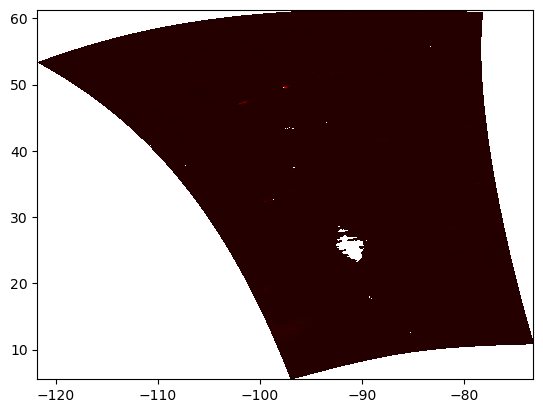

In [17]:
plt.figure()
plt.pcolor(longitude, latitude, no2, cmap='hot')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/image.py:499: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


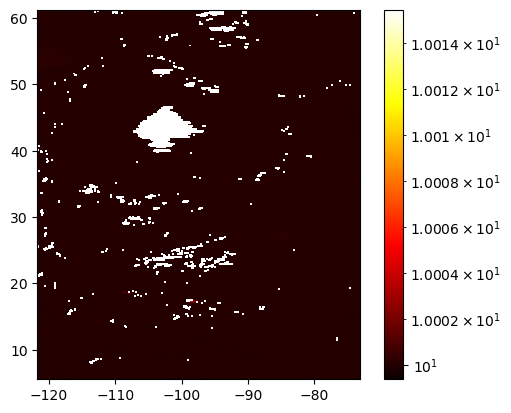

In [18]:
#plot on lognormal scale
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

plt.imshow(no2+10, extent=(np.amin(longitude), np.amax(longitude), np.amin(latitude), np.amax(latitude)),
        cmap=cm.hot, norm=LogNorm())
plt.colorbar()
plt.show()

## using xarrayy and cartopy 

In [19]:
#the following is from here; https://github.com/acgeospatial/Sentinel-5P/blob/master/sentinel5p_xarray_blog.ipynb   

In [20]:
trop = xr.open_dataset('/aosc/eos20/djallen//data/TropOMI/NO2/v2.01_test/201907/S5P_TEST_L2__NO2____20190708T181926_20190708T200056_08986_01_020100_20191121T122309.nc', group='PRODUCT')
print(trop)

<xarray.Dataset>
Dimensions:                                               (scanline: 806,
                                                           ground_pixel: 450,
                                                           time: 1, corner: 4,
                                                           polynomial_exponents: 6,
                                                           intensity_offset_polynomial_exponents: 1,
                                                           layer: 34,
                                                           vertices: 2,
                                                           state_vector_length: 12,
                                                           iterations: 20)
Coordinates:
  * scanline                                              (scanline) float64 ...
  * ground_pixel                                          (ground_pixel) float64 ...
  * time                                                  (time) datetime64[ns] ...
  *

In [21]:
## get the data for N02
no2 = (trop['nitrogendioxide_tropospheric_column_precision'])
print(no2)

<xarray.DataArray 'nitrogendioxide_tropospheric_column_precision' (time: 1,
                                                                   scanline: 806,
                                                                   ground_pixel: 450)>
[362700 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 1.361e+03 1.362e+03 ... 2.165e+03 2.166e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2019-07-08
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Precision of the t...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19


In [22]:
print(trop.latitude.attrs)
print(trop.longitude.attrs)

{'long_name': 'pixel center latitude', 'units': 'degrees_north', 'standard_name': 'latitude', 'valid_min': -90.0, 'valid_max': 90.0, 'bounds': '/PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds'}
{'long_name': 'pixel center longitude', 'units': 'degrees_east', 'standard_name': 'longitude', 'valid_min': -180.0, 'valid_max': 180.0, 'bounds': '/PRODUCT/SUPPORT_DATA/GEOLOCATIONS/longitude_bounds'}


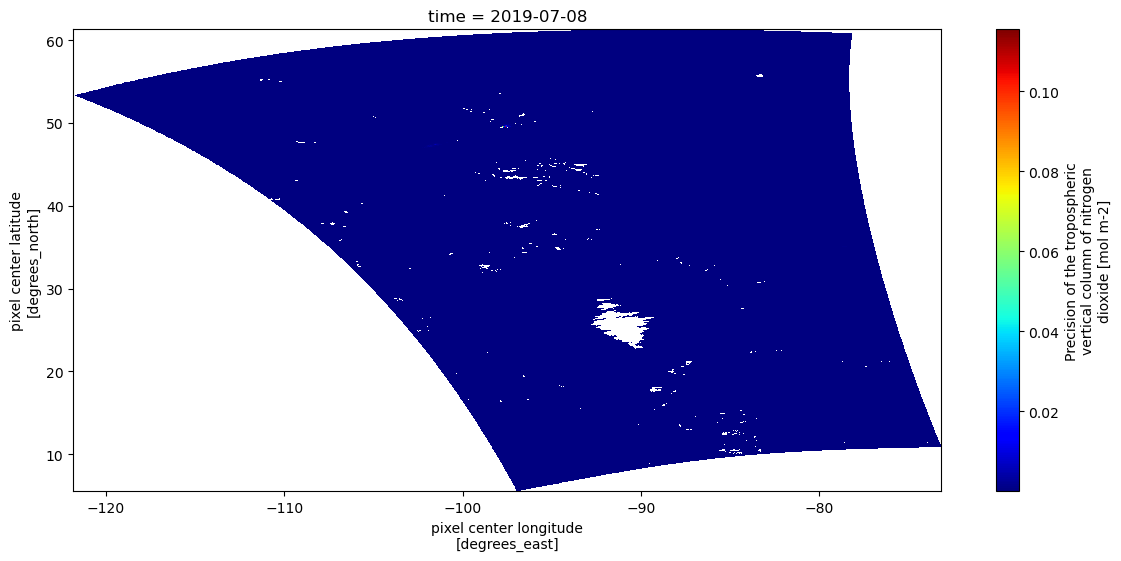

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
ax = plt.axes()


trop.nitrogendioxide_tropospheric_column_precision[0].plot.pcolormesh \
(ax=ax, x='longitude', y='latitude', add_colorbar=True, cmap='jet')

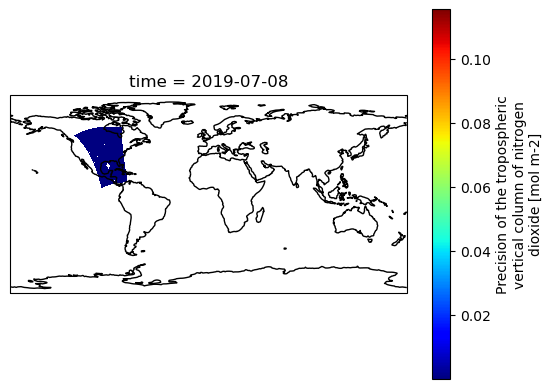

In [90]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())

trop.nitrogendioxide_tropospheric_column_precision[0].plot.pcolormesh(
    ax=ax, x='longitude', y='latitude', add_colorbar=True, cmap='jet')

ax.set_global(); ax.coastlines()

In [41]:
trop.nitrogendioxide_tropospheric_column_precision[0]

<xarray.DataArray 'nitrogendioxide_tropospheric_column_precision' (
                                                                   scanline: 806,
                                                                   ground_pixel: 450)>
[362700 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 1.361e+03 1.362e+03 ... 2.165e+03 2.166e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2019-07-08
    latitude      (scanline, ground_pixel) float32 ...
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Precision of the t...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

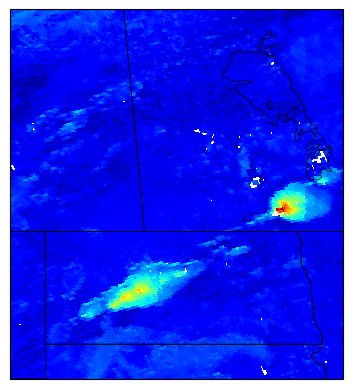

In [60]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())

ax.pcolormesh(
    trop.nitrogendioxide_tropospheric_column_precision[0].longitude.values, 
    trop.nitrogendioxide_tropospheric_column_precision[0].latitude.values, 
    trop.nitrogendioxide_tropospheric_column_precision[0].values,
    cmap='jet', transform=ccrs.PlateCarree(), norm=LogNorm())



ax.set_extent([-105, -96, 45, 55], crs=ccrs.PlateCarree())

# ax.set_global()
ax.coastlines()
ax.add_feature(cartopy.feature.STATES, linewidth=0.5)

plt.show()

In [63]:
trop.nitrogendioxide_tropospheric_column_precision #.sel(latitude=slice(45,50),longitude=slice(-105,-96))

<xarray.DataArray 'nitrogendioxide_tropospheric_column_precision' (time: 1,
                                                                   scanline: 806,
                                                                   ground_pixel: 450)>
[362700 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 1.361e+03 1.362e+03 ... 2.165e+03 2.166e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2019-07-08
    latitude      (time, scanline, ground_pixel) float32 ...
    longitude     (time, scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Precision of the t...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

In [ ]:
trop.nitrogendioxide_tropospheric_column_precision.sel(scanline=slice(), ground_pixel=slice())

In [77]:
trop.nitrogendioxide_tropospheric_column_precision[0]

<xarray.DataArray 'nitrogendioxide_tropospheric_column_precision' (
                                                                   scanline: 806,
                                                                   ground_pixel: 450)>
[362700 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 1.361e+03 1.362e+03 ... 2.165e+03 2.166e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2019-07-08
    latitude      (scanline, ground_pixel) float32 5.564 5.597 ... 60.81 60.79
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Precision of the t...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

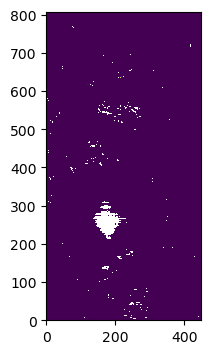

In [95]:
plt.figure(figsize=(2,4))
plt.pcolormesh(trop.nitrogendioxide_tropospheric_column_precision[0].values)

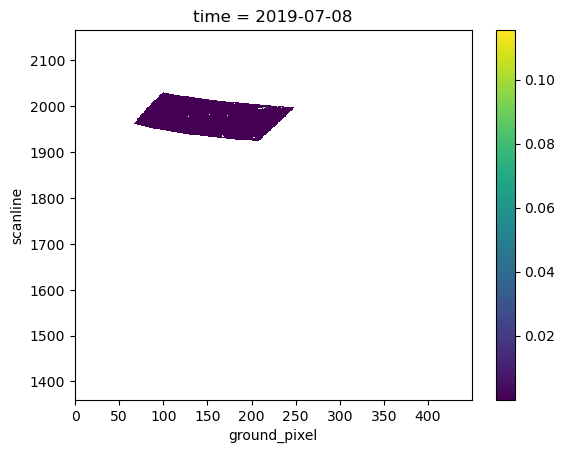

In [89]:
xr.where((
    trop.nitrogendioxide_tropospheric_column_precision[0].latitude>=45)&(
    trop.nitrogendioxide_tropospheric_column_precision[0].latitude<=50)&(
    trop.nitrogendioxide_tropospheric_column_precision[0].longitude>=-105)&(
    trop.nitrogendioxide_tropospheric_column_precision[0].longitude<=-96),
         trop.nitrogendioxide_tropospheric_column_precision[0],
         np.nan,
        ).plot.pcolormesh()

In [76]:
trop.nitrogendioxide_tropospheric_column_precision[0].latitude.values>=45

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [73]:
trop.nitrogendioxide_tropospheric_column_precision[0]

<xarray.DataArray 'nitrogendioxide_tropospheric_column_precision' (
                                                                   scanline: 806,
                                                                   ground_pixel: 450)>
[362700 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 1.361e+03 1.362e+03 ... 2.165e+03 2.166e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2019-07-08
    latitude      (scanline, ground_pixel) float32 5.564 5.597 ... 60.81 60.79
    longitude     (scanline, ground_pixel) float32 ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Precision of the t...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19